# APS1070
#### PCA - Project 3
**Deadline: March 13, 23:59 - 10 points**

Please fill out the following:


*   Your **name**: **Shashank Iyer**
*   Your **student number**: **1004859806**



Project 3 is structured a bit differently than Projects 1 and 2 - here, all the code for the tutorial part is given. You're encouraged to read closely, adjust and experiment to make sure you fully understand what the code is doing. Once you have a firm grasp of PCA, you should be in great shape for the exercises at the end. 

##**Marking Scheme:**

This project is worth **10 marks** of your final grade.

**One (1) mark** of the lab is dedicated to **vectorized coding**. If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases loops are inevitable).

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you go through your tutorial (Understanding the tutorial part can help you finish the exercise part). 

**The exercise** section is worth **9 points**.

##**Important Note:**
1] Start lab early so that you understand concepts in Tutorial well & get enough time to implement exercise

2] It is important to **run and understand the tutorial part** of the notebook.

3] Provide a graphical representation of data wherever necessary.



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. Complete exercises.


## Principle Component Analysis - Introduction

### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [5]:
labels = set(y)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

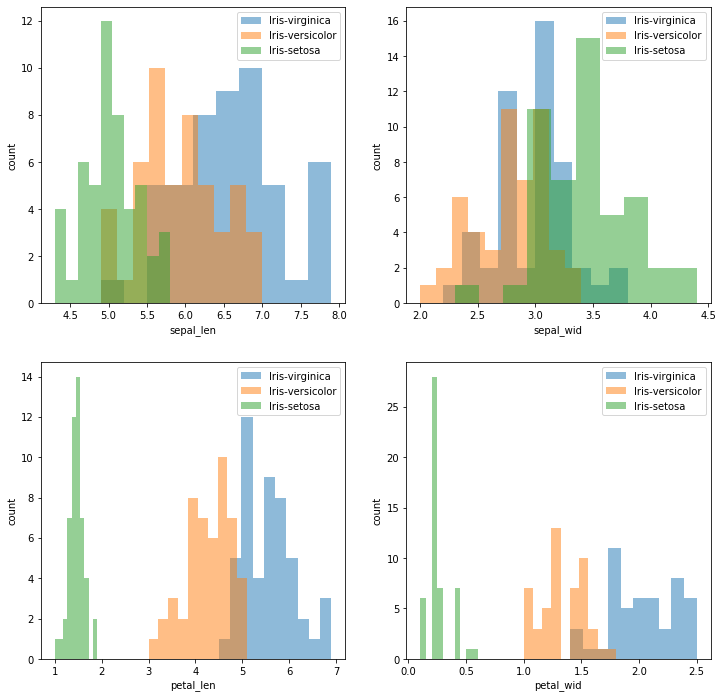

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1]

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for choosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label)
        
    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [7]:
X_std = StandardScaler().fit_transform(X)

In [8]:
X[:, 0].mean(), X_std[:, 0].mean()

(5.843333333333334, -4.736951571734001e-16)

In [9]:
X[:, 0].var(), X_std[:, 0].var()

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Methods to perform PCA:
1. The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.
2. But, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Using Covariance Matrix

In [10]:
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1) 
# or C = np.cov(X_std.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues

(array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]),
 array([2.93035378, 0.92740362, 0.14834223, 0.02074601]))

#### Using Singular Vector Decomposition

In [11]:
eigenVectors, s, v = np.linalg.svd(X_std.T)
eigenVectors

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [12]:
n, m = X_std.shape
eigenValues = s**2/(n-1)
eigenValues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Are the eigenVectors and the eigenValues returned by both the methods the same?

#### Sort based on eigenValues

Decreasing order of eigenValues.
It was not needed in this case as eigenValues were already in decreasing order.

In [13]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

### Explained Variance

In [14]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

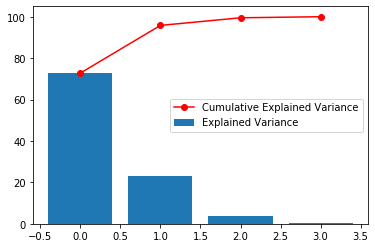

In [15]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?

### Projections

Since only 2 eigenVectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

In [16]:
COUNT = 2
W = eigenVectors[:, 0:COUNT]
W

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [17]:
projX = np.dot(X_std, W)
X.shape, projX.shape

((150, 4), (150, 2))

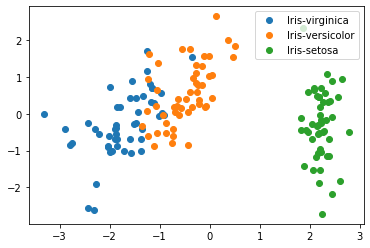

In [18]:
for label in labels:
    plt.plot(projX[y==label, 0], projX[y==label, 1], 'o', label=label)
    plt.legend(loc='upper right')

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs) 

We have used PCA on numerical data. But can it used on Image data?

## Eigenfaces

Let's face the Eigen.

### Intro

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. 

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [19]:
!pip install wget

In [20]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [21]:
# Download and unzip dataset.
filename = wget.download('https://github.com/aps1070-2019/datasets/raw/master/lfw-a.tgz', 'lfw-a.tgz')
!tar -xvzf "{filename}"

100% [....................................................] 14486641 / 14486641

'tar' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250] 

In [23]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]
        
        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale
            
            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image
                
            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [24]:
[X, y] = readImages()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'lfw'

In [ ]:
type(X), len(X)

In [ ]:
type(X[0]), X[0].shape

In [ ]:
type(y), len(y)

### Exploratory Data Analysis

Check from dataset if this image has correct label.

In [ ]:
print('Image name is: ', y[2])
plt.imshow(X[2], cmap=plt.cm.gray)
plt.show()

Creating a mean face from all dataset faces.

In [ ]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

In [ ]:
XMat = asRowMatrix(X);
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [ ]:
def getBasisCountThatPreservesVariance(eigenValues, variance=.95):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx
        
def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

Below image explains the PCA code above:

<img src='https://github.com/aps1070-2019/datasets/raw/master/img/eig-decom.png' />

In [ ]:
eigenValues, eigenVectors, mean = pca(XMat, y)

In [ ]:
# Above code in pca method is written because below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500). 

In [ ]:
eigenVectors[:, 0].shape

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

In [ ]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

In [ ]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
2. Answer the same for black hair.

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [ ]:
IMAGE_IDX = 10 # image idx in dataset

In [ ]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [ ]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

In [ ]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [ ]:
# create reconstructed images
numEvsSet = [100, 200, 298] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

In [ ]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [ ]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

Can you identify the person after 298 eigenVector reconstruction?

### Facial Recognition (Optional)

**How a new point would be classified on the IRIS dataset after PCA.**

1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor (one algorithm to accomplish this) between the projected training images and the projected query image. 

**How would a new face be classified (facial recognition) after PCA.**



**FunFact: EigenFaces is still often considered as a baseline comparison method to demonstrate the minimum expected performance of a facial recognition system.**

## Time Series Data - Exercises

The clock is ticking.

The dataset is of Tuberculosis prevalence over various countries between the given time period.

Data url: 'https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv'.

Answer the below questions.

You are free to do the below analysis over other time-series datasets of your interest (eg: financial stock data, etc.), provided the dataset has at least 15 columns (time points / features) and at least 100 rows (data points).

**Hints for getting the vectorized coding mark**
1.   Use np.dot instead of a loop to calculate the dot product
2.   If you want to subtract(add, multiply, divide) a constant from a vector, an array or a matrix, use vectorized coding.
3. If you want to do an element-wise operation between vectors, arrays or matrixes, use vectorized coding
4.   When you calculate the residual error in **Q3** and **Q5**, use vectorized coding. 

### Question 1

1. Display 30 random samples of the original time series data in a 10 x 3 (3 plots each in 10 rows) graph format.[0.5]  
2. Do you see any recurring patterns (ie oscillations, monotonic increase or decrease, other trends)?[0.5] **It is evident that a majority of the countries show a monotonic decrease, a few increase, however, a few show oscillating trends as well.**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv', 
    thousands = ',')

print(df.shape)
df.head()

(207, 19)


,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


     1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  \
61    245   245   242   239   235   232   232   225   203   114   114   111   
68    359   340   325   318   316   293   312   320   359   366   434   249   
84    586   577   566   555   542   525   517   501   487   476   443   411   
5     514   514   513   512   510   508   512   363   414   384   530   335   
176    94    89    84    80    75    71    67    61    54    48    41    37   
153    17    17    16    16    16    15    16    15    11    12    15    13   
152   190   211   226   243   259   278   297   316   339   383   442   503   
78    404   403   402   399   395   390   390   387   385   386   273   276   
77    241   248   255   262   269   275   277   293   305   317   332   346   
40    327   321   315   309   303   303   290   283   276   273   269   265   
186    83    79    77    73    68    62    62    63    64    57    49    45   
16      8     8     7     7     6     6     6     6 

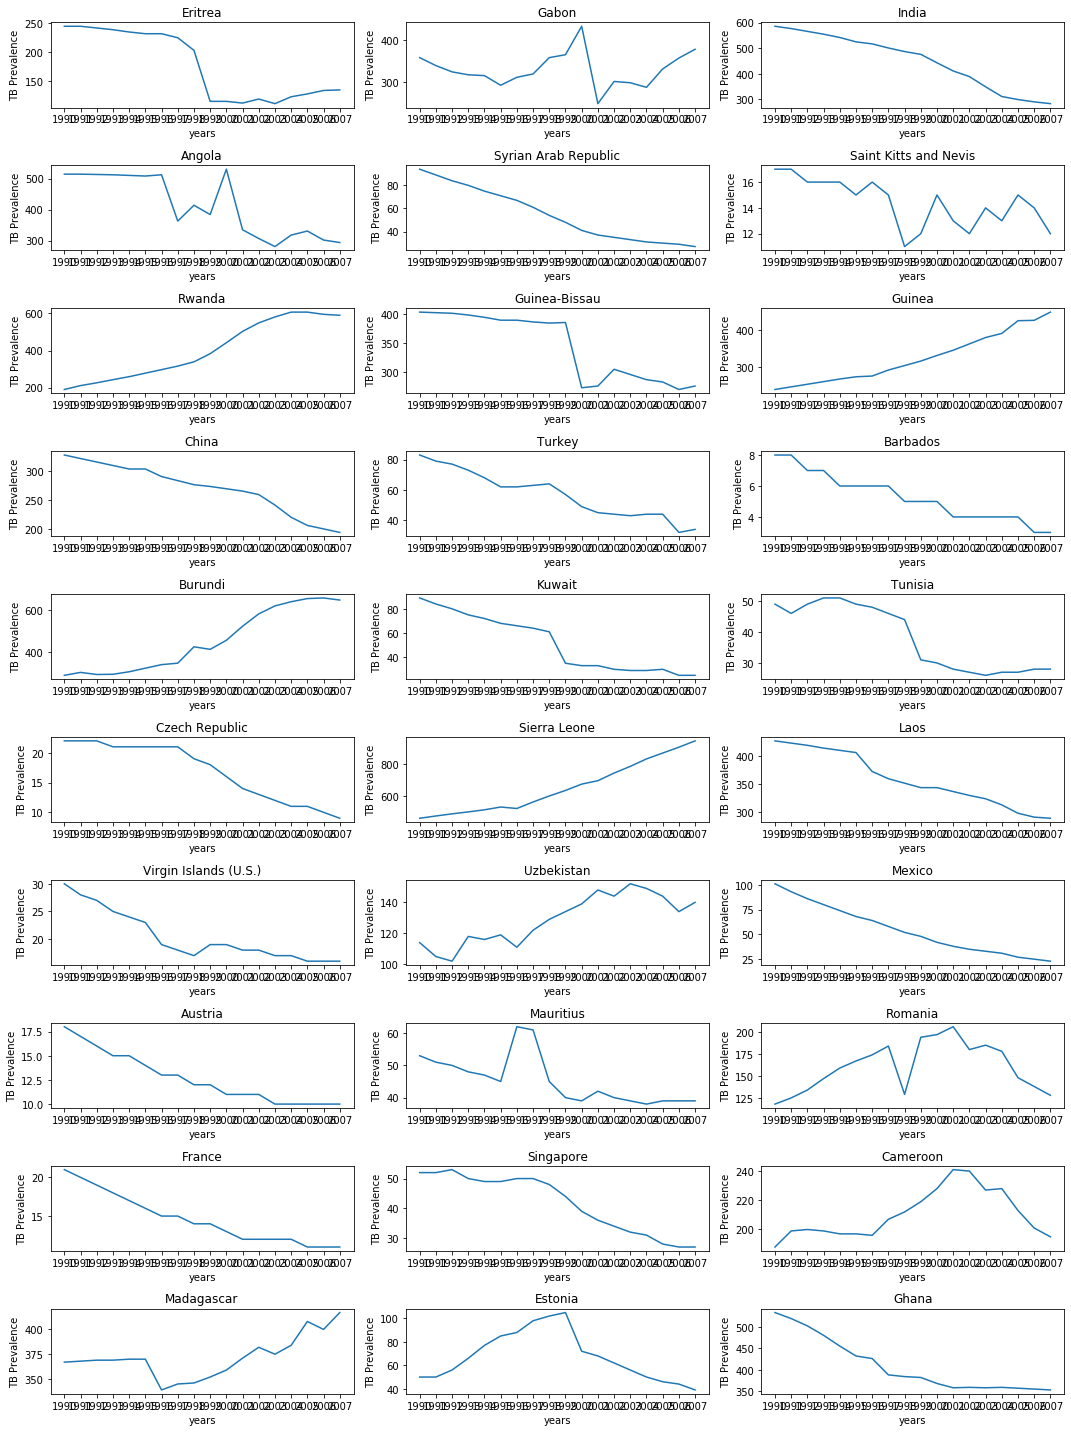

In [26]:
random_sample = df.sample(n=30)#choosing random 30 rows from data frame
random_s1 = random_sample.iloc[:,1:19] #separating out the feature data from the data frame
print(random_s1)
random_c = np.asarray(random_sample.iloc[:,0]) #selecting country names to assign to the plots below
print(random_c)
fig, axes = plt.subplots(10, 3, figsize=(15,20)) #to define a layout and size of graphs
col = 0
row = 0
i = 0
for row in range(10):
  for col in range (3):
    axes[row].flat[col].plot(random_s1.columns, random_s1.iloc[i,0:]) #setting the x axis values as the years, which come from the column headers and the y values as the numerical data that comes from all the rows in the sampled dataframe for each specific column/year
    axes[row].flat[col].set_title(random_c[i])
    axes[row].flat[col].set_xlabel('years')
    axes[row].flat[col].set_ylabel('TB Prevalence')
    i = i+1

plt.tight_layout()
plt.show()

### Question 2

1. Show the first 6 principle components plotted as a time series (in a 3 plots/row format).[0.5]  
2. Based on your knowledge of the dataset contents, can you explain what any of the principle components might represent?[0.5] **The principle components are the eigen vectors of the new PCA feature space. They are the principle directions which have the maximum covariance (contain maximum data) in that particular direction of the feature.**

(18, 6)


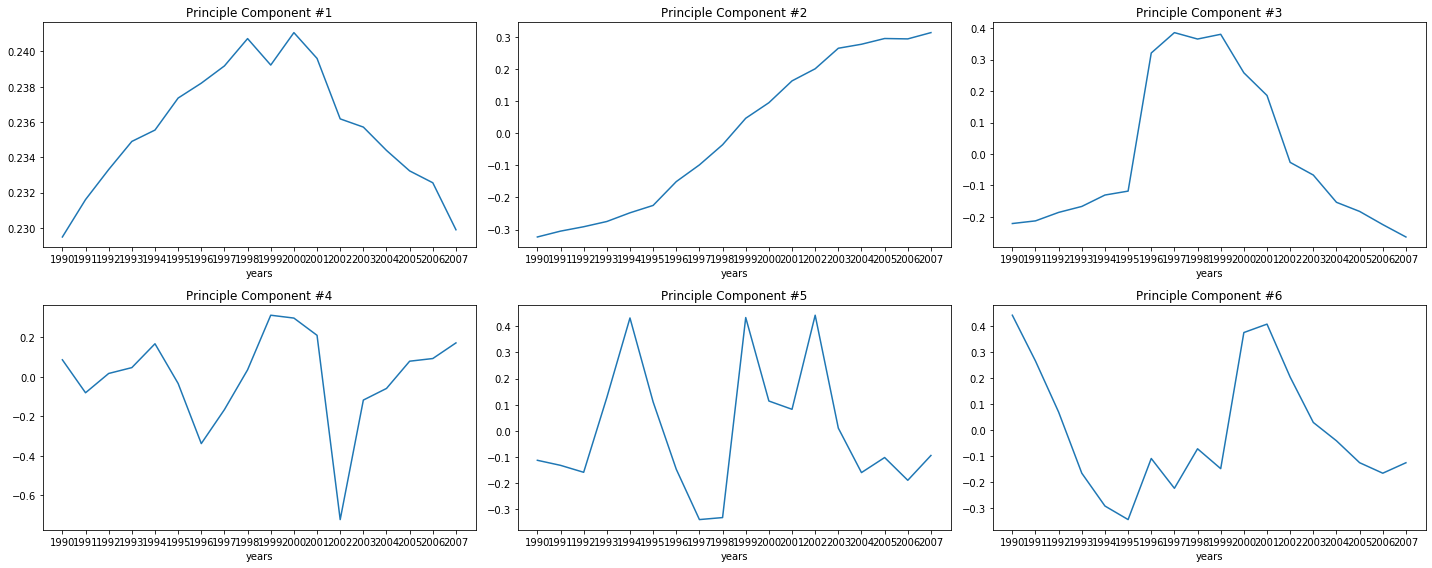

In [27]:
feature = df.iloc[:,1:19] #Feature Data
countries = df.iloc[:,0] #Country Names

feature_stand = StandardScaler().fit_transform(feature) #It transforms the data set to a mean close to 0 and variance close to 1 by formula (Xi - Xmean)/Std_of_the_feature

a, b = feature_stand.shape

# Compute covariance matrix
Covariance = np.dot(feature_stand.T, feature_stand) / (a-1) #means square of (standard deviation square)/(n-1) or number of samples in the subspace
#print(C.shape) #gives a matrix of 18x18 as 18x297 dot 297x18 =  18x18 matrix

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(Covariance) #The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
eigenVectors, eigenValues #here we will get 18x18 matrix for eigen vectors as there are 18 features so 18 covariances (hence 18 vectors) and 18 dimensions to express the data (hence 18 elements per vector)

#sorting the eigen values and vectors
sorted_index = (-eigenValues).argsort() #returns the indices after arranging the array (eigenValues) in Descending order (due to a negative sign infront of the eigenValues)
eigenValues = eigenValues[sorted_index] #eaigenValues array rearranged by using the sorted element's indices in the args array
eigenVectors = eigenVectors[:, sorted_index] #eaigenVectors array rearranged by using the sorted element's indices in the args array

#first 6 principle components
pc_6 = eigenVectors[:,0:6] #since the eigenvectors are stacked row wise so we select the first 6 rows i.e. 0 to 5

print(pc_6.shape)

# time series for the first 6 principle components
fig, axes = plt.subplots(2, 3, figsize=(20,8)) #to define a layout and size of graphs
col = 0
row = 0
i = 0
for row in range(2):
  for col in range (3):
    axes[row].flat[col].plot(feature.columns, pc_6[:,i])
    axes[row].flat[col].set_title('Principle Component #{}'.format(i+1))
    axes[row].flat[col].set_xlabel('years')
    i = i+1

plt.tight_layout()
plt.show()


### Question 3

1. Pick an interesting data sample (ie, data from a single country) and display it.[0.5] 

2. Next, show its incremental reconstruction using the first 1-6 components overlayed on the original data (again plotted as a time series in a 3 plots/row format, 6 plots in total).[1]

3. In addition, show another plot with the residual error of each reconstruction compared to the original sample and a title that states the RMSE of the reconstruction for each of the 6 components (again plotted as a time series in a 3 plots/row format, 6 plots in total).[1]

Text(0, 0.5, 'TB Prevalence')

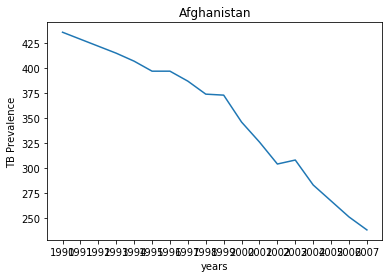

In [28]:
#One interesting data of a country
sample_int = df[df['TB prevalence, all forms (per 100 000 population per year)'] == 'Afghanistan'] #selecting a specific country from pandas data frame
sample_int_x = sample_int.iloc[:,1:19]
sample_int_y = sample_int.iloc[:,0]
plt.plot(sample_int_x.columns, sample_int_x.iloc[0,0:])
plt.title('Afghanistan')
plt.xlabel('years')
plt.ylabel('TB Prevalence')


mean shape (18, 1)
(18, 1)


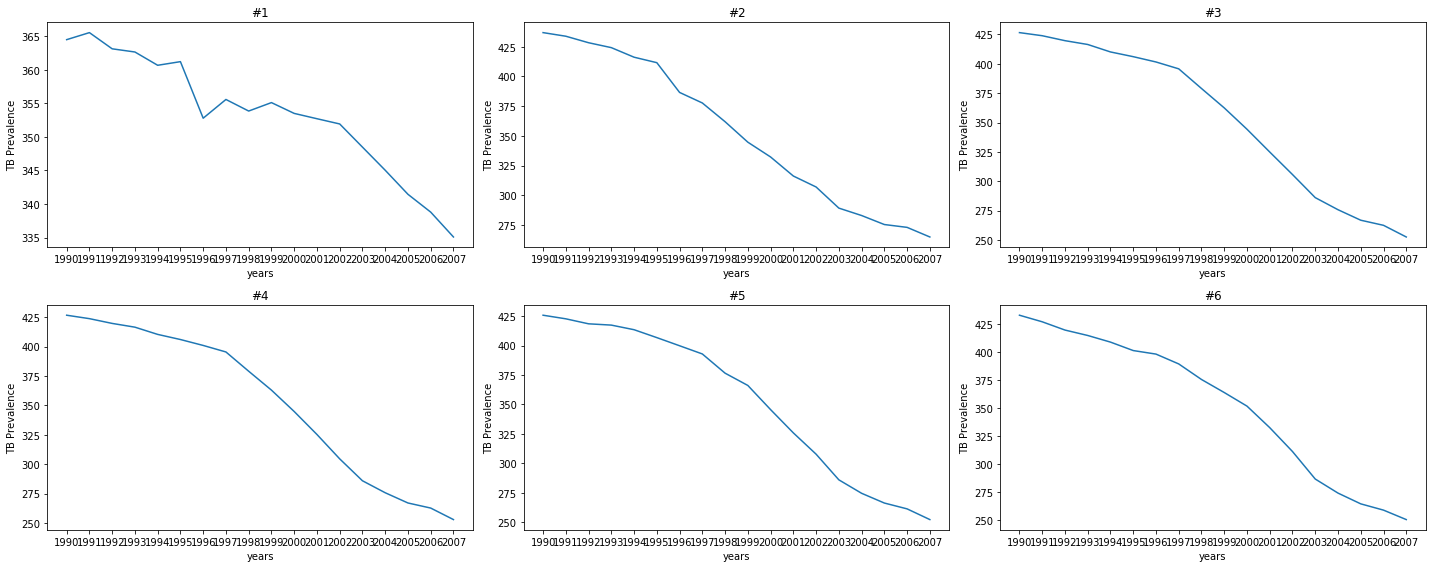

In [29]:
def project (W , X , mu):
    return np.dot (W.T,X - mu)
def reconstruct (W , Y , mu):
    return np.dot (W,Y) + mu
mean = df.mean(axis=0).values.reshape(-1,1)
print('mean shape', mean.shape)

pc_6[:,0:1].T.shape
sample_int_x.shape
#reconstructed country data
COUNT = 6
recon_data = []
for numEvs in range (1, COUNT+1):
    
    P = project(pc_6[:, 0:numEvs], sample_int_x.T, mean)
    R = reconstruct(pc_6[:, 0:numEvs], P, mean)
    recon_data.append(R)

print(recon_data[2].shape)


#reconstructed data plot
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(20, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.plot(sample_int_x.columns, recon_data[i])
    plt.xlabel('years')
    plt.ylabel('TB Prevalence')
    plt.title('#{}'.format(i+1))
plt.tight_layout()



(1, 18)


Text(0.5, 1.0, 'RMSE of reconstruction for each of the 6 principal components')

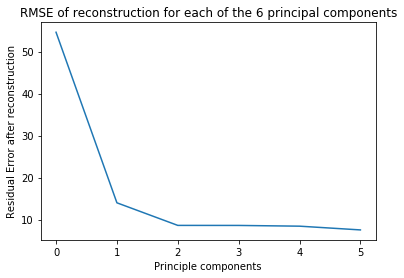

In [30]:
#RMSE

rmse = []

print(sample_int_x.shape)
recon_data[0].shape



for i in range(0,6):
  rmse.append(np.sqrt(np.square(np.subtract(sample_int_x.values,recon_data[i].T)).mean(axis = 1)))
  i=i+1

plt.plot(rmse)
plt.xlabel('Principle components')
plt.ylabel('Residual Error after reconstruction')
plt.title('RMSE of reconstruction for each of the 6 principal components')

### Question 4

1. Plot the eigenvalues of the first 15 (or more) principle components and choose a number k of principle components that you believe will allow you to reconstruct the data well.[0.5]  
2. How many did you choose and why? Use some plots to support your claim[0.5]

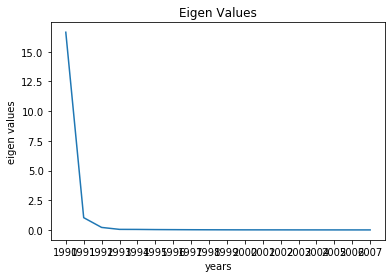

In [31]:
##18 Eigen Values
plt.plot(feature.columns, eigenValues)
plt.xlabel('years')
plt.ylabel('eigen values')
plt.title('Eigen Values')

#cumulative chart for eigen values  

eigVal_sum = sum(eigenValues)
exp_Var = [eig/eigVal_sum*100 for eig in eigenValues] #calculation of eigen value % that define the data cluster
cum_Exp_Var = np.cumsum(exp_Var) #calculation of cumulative eigen value %



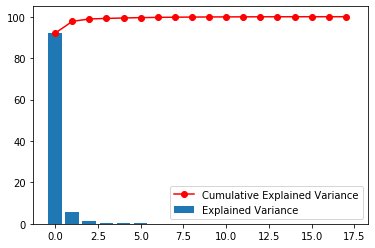

In [32]:
plt.bar(range(18), exp_Var, label='Explained Variance') #range = number of features
plt.plot(cum_Exp_Var, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

### Question 5

1. Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3.[0.5] **Mean = 353.3333333333333, Standard Deviation = 62.8852570604236**

  Random walk refers to any process in which there is no observable pattern or trend; that is, where the movements of an object, or the values taken by a certain variable, are completely random. Each "step" taken in a random walk can be sampled from a distribution. You may find the methods numpy.random.normal, numpy.cumsum useful for creating random walks. 

2. Make 6 time series of random walks of the same length as the time series in this dataset. Random walks created should have the same mean M and standard deviation StD as the data sample choosen. Each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample.[1]
    - Show for a sample random walk it's mean and standard deviation matches M and StD respectively.
    - Visualize these 6 time series in a 2 x 3 plot.


3. Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]
4. Compare these RMSE values with the ones you got for question 3 and explain the result.[0.5]

In [34]:
mean_1 = sample_int_x.values.mean()
std_1 = sample_int_x.values.std()

print('the mean of interesting data for India is ', mean_1)
print('the standard deviation of interesting data for India is ', std_1)

the mean of interesting data for India is  353.3333333333333
the standard deviation of interesting data for India is  62.8852570604236


In [35]:
rand_walk = []
rand_walk_mean = []

for i in range(0,6):
  x = np.random.normal(size=18)
  y = np.cumsum(x)
  mean_y = y.mean()
  std_y = y.std()
  normal_y = (y-mean_y)/std_y
  rand_walk.append(((normal_y*std_1)+mean_1))
  rand_walk_mean.append(((normal_y*std_1)+mean_1).mean())


#sample random walk it's mean and standard deviation matching.

sample_randwalk = np.array((rand_walk[0].mean(),rand_walk[0].std()))
table_1 = np.hstack((mean_1,std_1))
table_1 = np.vstack((table_1, sample_randwalk))
table_1 = pd.DataFrame(table_1)
table_1.insert(0, "Country", ['Interesting Country - Afghanistan', 'Sample Random walk'])
table_1.columns = ['Country', 'Mean', 'Standard Deviation']

print(table_1)
print(rand_walk_mean[4])
print(rand_walk[0].shape)

                             Country        Mean  Standard Deviation
0  Interesting Country - Afghanistan  353.333333           62.885257
1                 Sample Random walk  353.333333           62.885257
353.33333333333326
(18,)


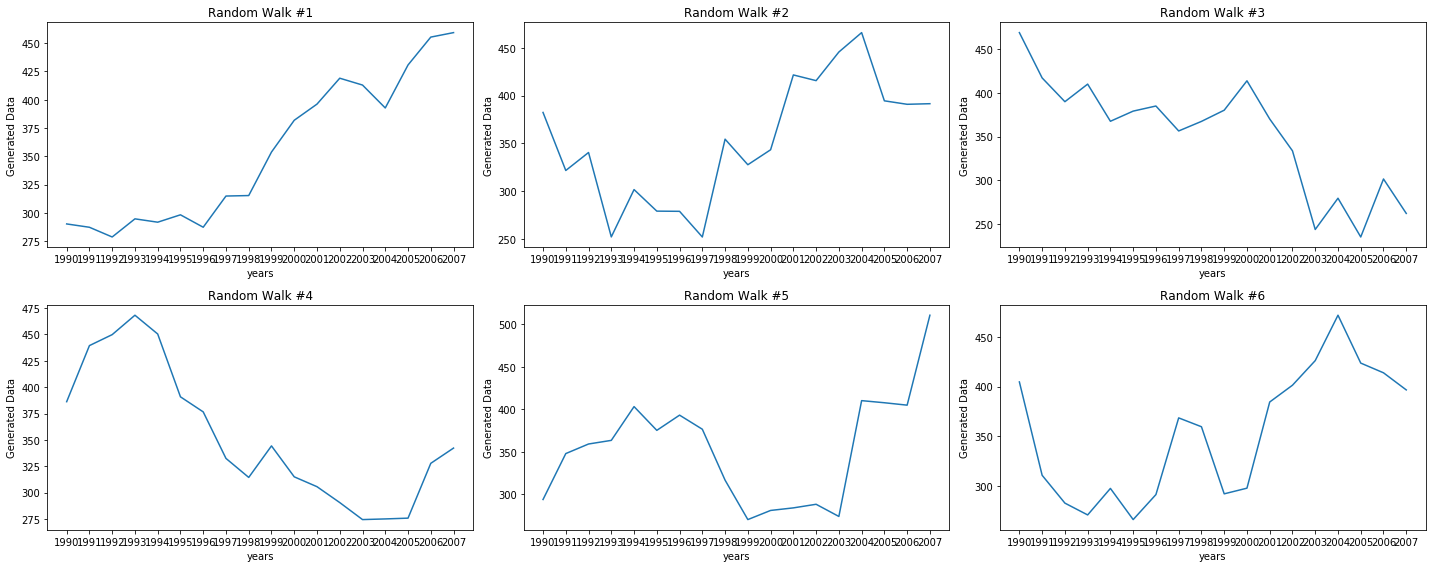

In [40]:
#Visualize these 6 time series in a 2 x 3 plot.
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(20, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.plot(sample_int_x.columns, rand_walk[i])
    plt.title('Random Walk #{}'.format(i+1))
    plt.xlabel('years')
    plt.ylabel('Generated Data')
plt.tight_layout()

In [37]:
k = 3

pc_k = eigenVectors[:,0:k]

df_rand_walk = pd.DataFrame(rand_walk)

mean_rand_walk = df_rand_walk.mean(axis = 0).values.reshape(-1,1)

print('mean shape', mean_rand_walk.shape)
print('pck shape', pc_k.shape)
print('randwalk', rand_walk[0].shape)
print(rand_walk[0].reshape(-1,1).T.shape)

mean shape (18, 1)
pck shape (18, 3)
randwalk (18,)
(1, 18)


(18, 1)
(18, 1)
[ 70.50969104 109.03755168  15.42075453  32.49951889  79.94580326
 110.06854438]


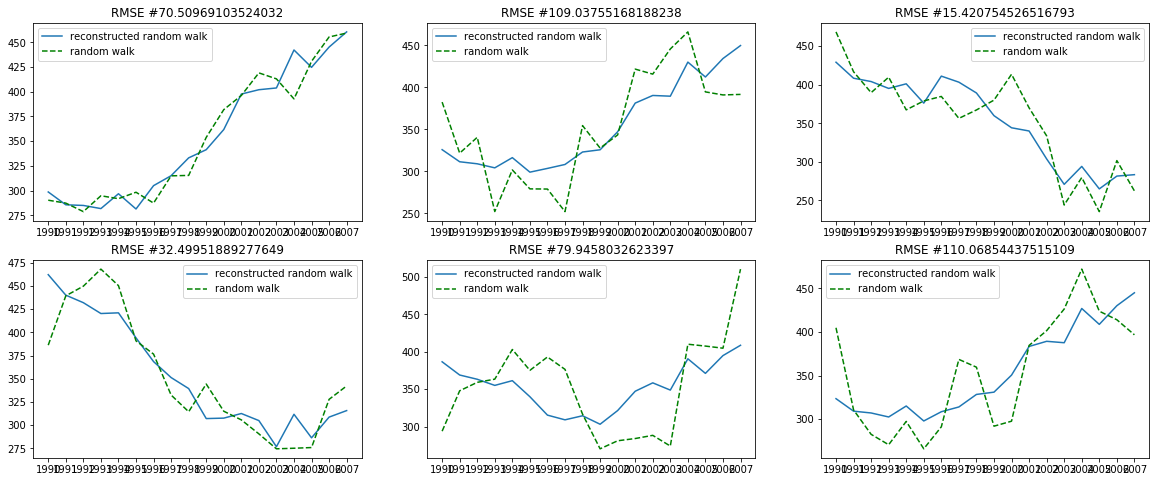

In [45]:
#Q5.3 Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]

def project (W , X , mu):
    return np.dot (W.T,X - mu)
def reconstruct (W , Y , mu) :
    return np.dot (W,Y) + mu

# create reconstructed data
COUNT = 6
recon_rand = []
for numEvs in range (1, COUNT+1):
    # P = project(pc6[:, 0:numEvs], sampledesh_x, sampledesh_x.mean())
    P = project(pc_k, rand_walk[numEvs-1].reshape(-1,1), mean_rand_walk)
    R = reconstruct(pc_k, P, mean_rand_walk)
    recon_rand.append(R)

rmse_new = []    
for q in range(0,6):
  rmse_new.append(np.sqrt(np.square(np.subtract(recon_rand[q],recon_data[q])).mean())) 

rmse_new = np.array(rmse_new)

print(recon_rand[1].shape)
print(recon_data[1].shape)
print(rmse_new)


# plot reconstructed data
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(20, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.plot(sample_int_x.columns, recon_rand[i], label = 'reconstructed random walk')
    plt.plot(sample_int_x.columns, rand_walk[i], color='green', linestyle = 'dashed', label = 'random walk')
    plt.legend()
    plt.title('RMSE #{}'.format(rmse_new[i]))



 values of eigen vecotrs in q3 must be compared to the rmse corresponding to the k in q5

RSME in q5 wrt k=3 [ 70.50969104 109.03755168  15.42075453  32.49951889  79.94580326
 110.06854438]
RSME in q3 wrt 3 eigen vectors [8.60174128]


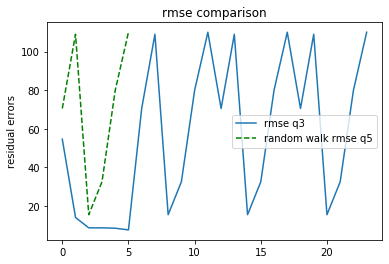

In [46]:
# Compare these RMSE values with the ones you got for question 3.[1]

plt.plot(rmse, label = 'rmse q3')
plt.plot(rmse_new, color='green', linestyle = 'dashed', label = 'random walk rmse q5')
plt.title('rmse comparison')
plt.ylabel('residual errors')
plt.legend()

print(' values of eigen vecotrs in q3 must be compared to the rmse corresponding to the k in q5')
print()
print("RSME in q5 wrt k=3", rmse_new)
print("RSME in q3 wrt 3 eigen vectors", rmse[2])

### Question 6

Explain how could you use PCA to do anomaly detection.[0.5]

**While performing PCA for data with many outliers, the mean & covariances matrix would be affected drastically by these outliers. These outliers would thereby, change the principal component axis with respect to the original, and would generate a higher RMSE. Thus, this could be used as an idication of an anomaly, thereby befitting our purpose.**

## References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Eigenfaces:
1. Snippets from: https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
2. https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

Author: Parth Jaggi
Modified by: Zheda Mai